# Summer Olympics Data Analysis Assignment

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
df=pd.read_csv("summer.csv")

In [3]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [4]:
df.dropna(inplace=True)

### 1. In how many cities Summer Olympics is held so far?

In [5]:
df["City"].nunique()

22

In [6]:
df["City"].unique().tolist()

['Athens',
 'Paris',
 'St Louis',
 'London',
 'Stockholm',
 'Antwerp',
 'Amsterdam',
 'Los Angeles',
 'Berlin',
 'Helsinki',
 'Melbourne / Stockholm',
 'Rome',
 'Tokyo',
 'Mexico',
 'Munich',
 'Montreal',
 'Moscow',
 'Seoul',
 'Barcelona',
 'Atlanta',
 'Sydney',
 'Beijing']

### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [7]:
df[df['Medal']=="Gold"].Sport.value_counts().head()

Aquatics      1421
Athletics     1214
Rowing         890
Gymnastics     820
Fencing        552
Name: Sport, dtype: int64

In [8]:
data=[]
for idx,name in enumerate(df[df['Medal']=="Gold"].Sport.value_counts().head().index.tolist()):
    data.append([name,df[df['Medal']=="Gold"].Sport.value_counts().head()[idx]])
print(data)

[['Aquatics', 1421], ['Athletics', 1214], ['Rowing', 890], ['Gymnastics', 820], ['Fencing', 552]]


<AxesSubplot:xlabel='sport'>

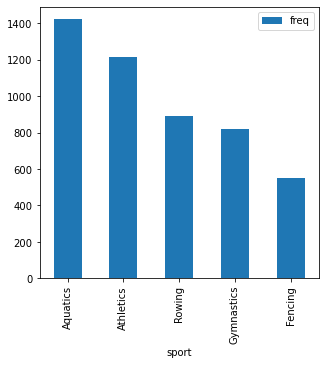

In [9]:
pd.DataFrame(data,columns = ['sport','freq']).sort_values(by='freq', ascending=False).head().plot(x = 'sport', y = 'freq', kind = 'bar', figsize = (5,5))

### 3. Which sport is having most number of medals so far? (Top 5)

In [11]:
df.Sport.value_counts().head()

Aquatics      4170
Athletics     3637
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Sport, dtype: int64

In [12]:
data=[]
for idx,name in enumerate(df.Sport.value_counts().index.tolist()):
    data.append([name,df.Sport.value_counts()[idx]])
print(data)

[['Aquatics', 4170], ['Athletics', 3637], ['Rowing', 2667], ['Gymnastics', 2307], ['Fencing', 1613], ['Football', 1497], ['Hockey', 1422], ['Wrestling', 1211], ['Shooting', 1150], ['Sailing', 1109], ['Cycling', 1105], ['Basketball', 1012], ['Canoe / Kayak', 1002], ['Volleyball', 994], ['Handball', 973], ['Equestrian', 939], ['Boxing', 894], ['Weightlifting', 591], ['Judo', 491], ['Baseball', 335], ['Archery', 329], ['Tennis', 296], ['Rugby', 192], ['Softball', 180], ['Modern Pentathlon', 180], ['Table Tennis', 144], ['Badminton', 144], ['Taekwondo', 112], ['Tug of War', 94], ['Canoe', 81], ['Polo', 66], ['Lacrosse', 59], ['Golf', 30], ['Ice Hockey', 27], ['Skating', 27], ['Cricket', 24], ['Triathlon', 24], ['Rackets', 10], ['Croquet', 8], ['Water Motorsports', 5], ['Basque Pelota', 4], ['Jeu de paume', 3], ['Roque', 3]]


<AxesSubplot:xlabel='sport'>

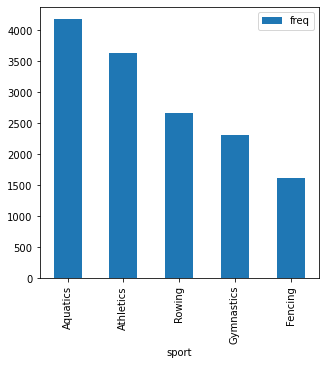

In [13]:
pd.DataFrame(data,columns = ['sport','freq']).sort_values(by='freq', ascending=False).head().plot(x = 'sport', y = 'freq', kind = 'bar', figsize = (5,5))

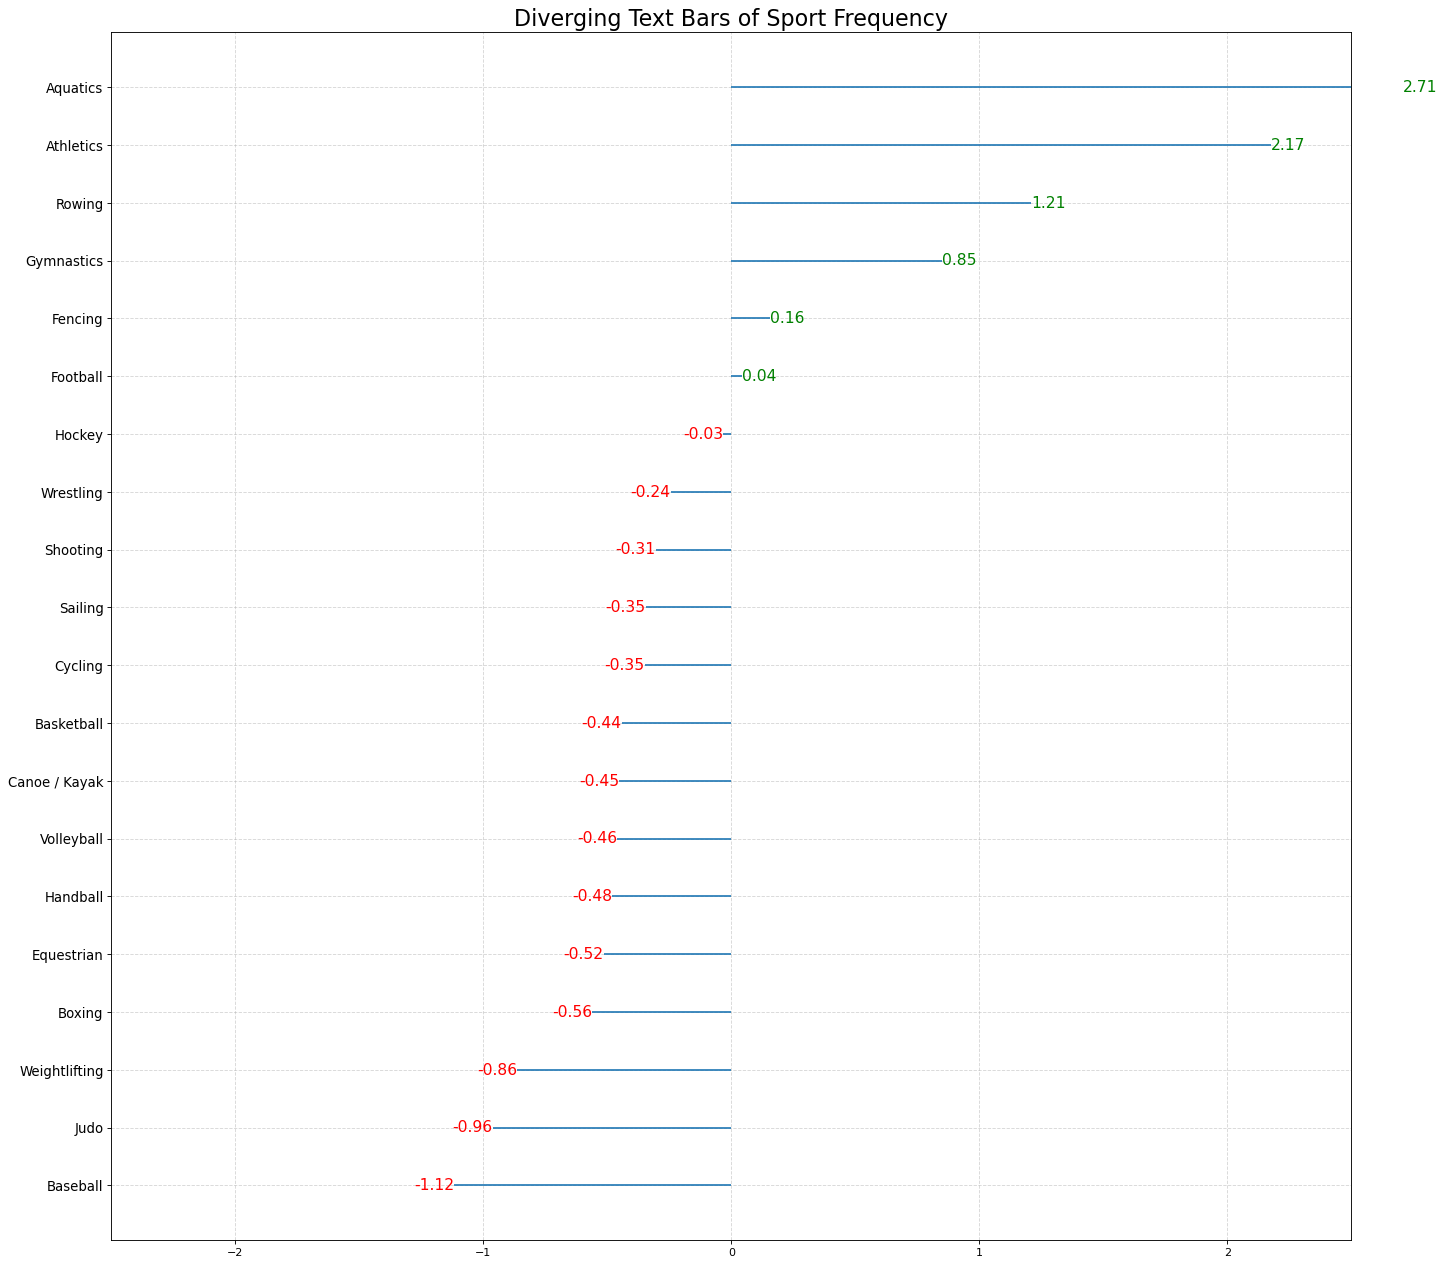

In [14]:
dataFrame=pd.DataFrame(data,columns = ['sport','freq']).head(20)

x = dataFrame.loc[:, ['freq']]
dataFrame['freq_z'] = ((x - x.mean())/x.std())
dataFrame['colors'] = ['red' if i < 0 else 'blue' for i in dataFrame['freq_z']]
dataFrame.sort_values('freq_z', inplace=True)
dataFrame.reset_index(inplace=True)

# Draw plot

plt.figure(figsize=(20,20), dpi= 80)


plt.hlines(y=dataFrame.index, xmin=0, xmax=dataFrame.freq_z)
for x, y, tex in zip(dataFrame.freq_z, dataFrame.index, dataFrame.freq_z):
    t = plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':14})

# Decorations    
plt.yticks(dataFrame.index, dataFrame.sport, fontsize=12)
plt.title('Diverging Text Bars of Sport Frequency', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-2.5, 2.5)
plt.show()

### 4. Which player has won most number of medals? (Top 5)

In [15]:
df.Athlete.value_counts().head()

PHELPS, Michael       22
LATYNINA, Larisa      18
ANDRIANOV, Nikolay    15
ONO, Takashi          13
SHAKHLIN, Boris       13
Name: Athlete, dtype: int64

In [16]:
data=[]
for idx,name in enumerate(df.Athlete.value_counts().head().index.tolist()):
    data.append([name,df.Athlete.value_counts().head()[idx]])
print(data)

[['PHELPS, Michael', 22], ['LATYNINA, Larisa', 18], ['ANDRIANOV, Nikolay', 15], ['ONO, Takashi', 13], ['SHAKHLIN, Boris', 13]]


<AxesSubplot:xlabel='Athlete'>

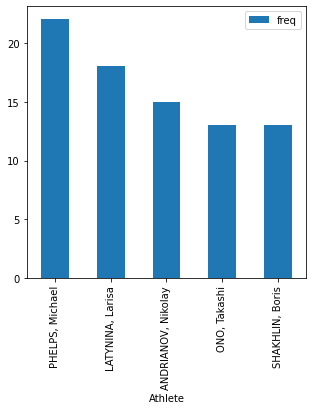

In [17]:
pd.DataFrame(data,columns = ['Athlete','freq']).sort_values(by='freq', ascending=False).head().plot(x = 'Athlete', y = 'freq', kind = 'bar', figsize = (5,5))

### 5. Which player has won most number Gold Medals of medals? (Top 5)

In [18]:
df[df.Medal=="Gold"].Athlete.value_counts().head()

PHELPS, Michael     18
LATYNINA, Larisa     9
LEWIS, Carl          9
NURMI, Paavo         9
SPITZ, Mark          9
Name: Athlete, dtype: int64

In [19]:
data=[]
for idx,name in enumerate(df[df.Medal=="Gold"].Athlete.value_counts().head().index.tolist()):
    data.append([name,df[df.Medal=="Gold"].Athlete.value_counts().head()[idx]])
print(data)

[['PHELPS, Michael', 18], ['LATYNINA, Larisa', 9], ['LEWIS, Carl', 9], ['NURMI, Paavo', 9], ['SPITZ, Mark', 9]]


<AxesSubplot:xlabel='Athlete'>

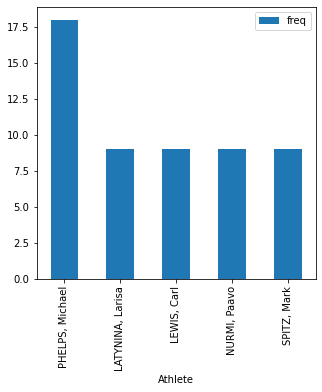

In [20]:
pd.DataFrame(data,columns = ['Athlete','freq']).sort_values(by='freq', ascending=False).head().plot(x = 'Athlete', y = 'freq', kind = 'bar', figsize = (5,5))

In [21]:
data2=[]
for idx,name in enumerate(df[df.Medal=="Gold"].Athlete.value_counts().index.tolist()):
    data2.append([name,df[df.Medal=="Gold"].Athlete.value_counts()[idx]])

[['PHELPS, Michael', 18], ['LATYNINA, Larisa', 9], ['LEWIS, Carl', 9], ['NURMI, Paavo', 9], ['SPITZ, Mark', 9], ['BIONDI, Matthew', 8], ['EWRY, Ray', 8], ['KATO, Sawao', 8], ['FISCHER, Birgit', 8], ['THOMPSON, Jenny', 8], ['SHAKHLIN, Boris', 7], ['ANDRIANOV, Nikolay', 7], ['GEREVICH, Aladar', 7], ['CHUKARIN, Viktor Ivanovich', 7], ['CASLAVSKA, Vera', 7], ['OTTO, Kristin', 6], ['VEZZALI, Valentina', 6], ['NAKAYAMA, Akinori', 6], ['SCHERBO, Vitaly', 6], ['KOVACS, Pal Adam', 6], ['HOY, Chris', 6], ['KLIMKE, Reiner', 6], ['FREDRIKSSON, Gert', 6], ['VAN DYKEN, Amy', 6], ['NADI, Nedo', 6], ['BOLT, Usain', 6], ['KARPATI, Rudolf', 6], ['VAN INNIS, Hubert', 6], ['MANGIAROTTI, Edoardo', 6], ['LILLOE-OLSEN, Ole Andreas', 5], ['LEE, Willis', 5], ['WEISSMULLER, Johnny', 5], ['ASTAKHOVA, Polina', 5], ['ONO, Takashi', 5], ['COMANECI, Nadia', 5], ['RITOLA, Ville', 5], ['ENDO, Yukio', 5], ['DAVYDOVA, Anastasia', 5], ['FISHER, Morris', 5], ['ANDRUNACHE, Georgeta', 5], ['KIM, Nelli', 5], ['HALL, Gary Jr.

<AxesSubplot:xlabel='Athlete'>

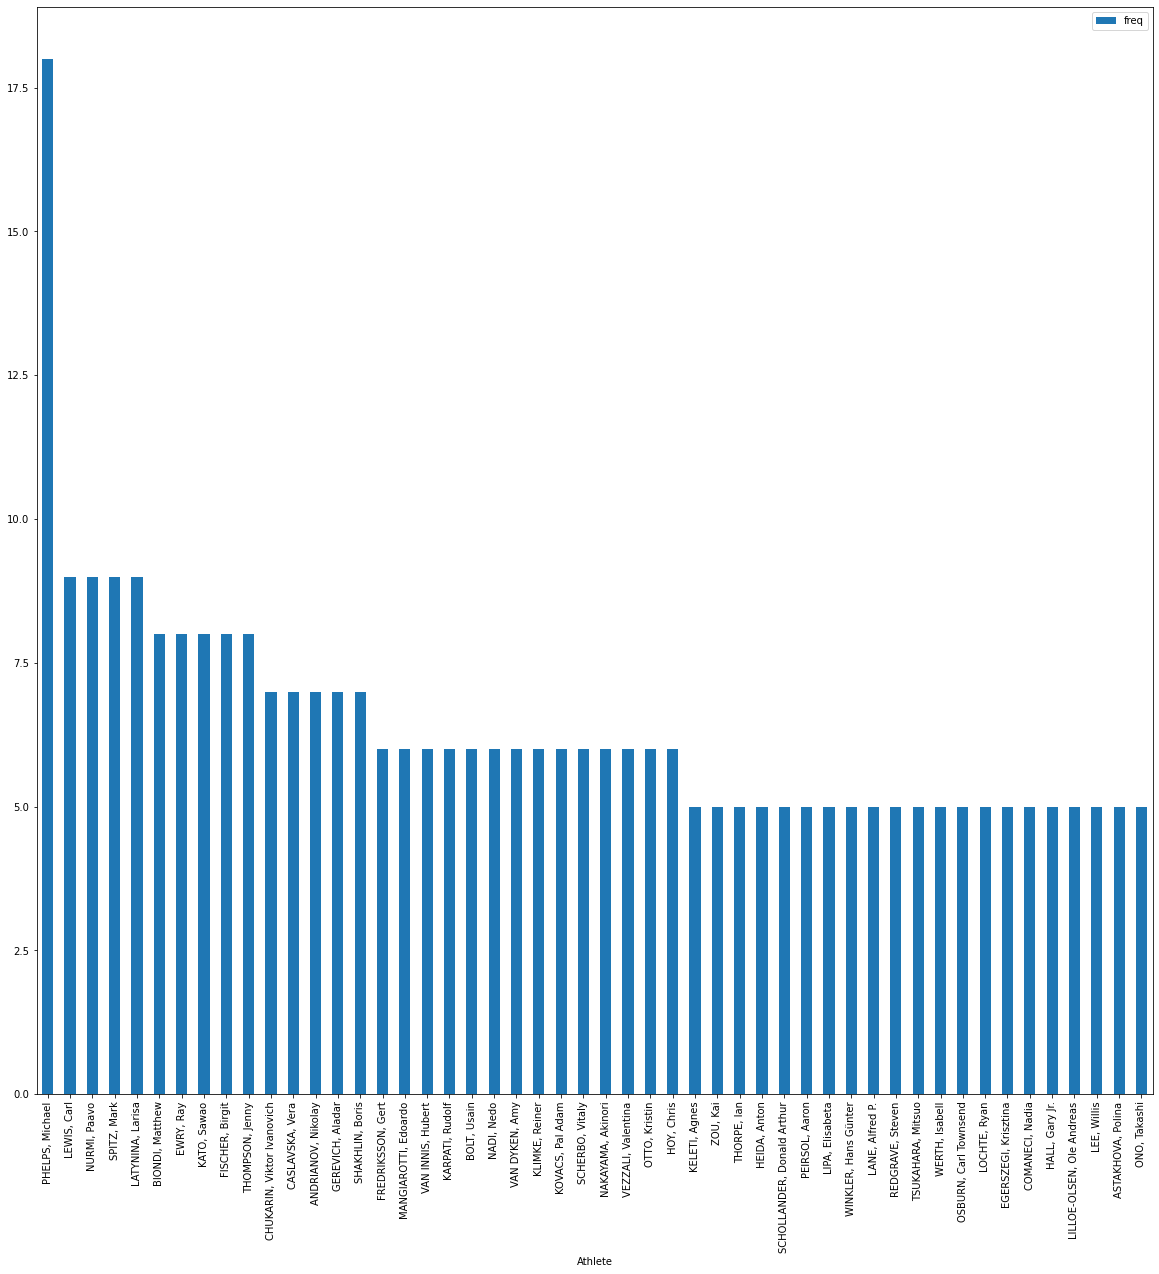

In [22]:
pd.DataFrame(data2,columns = ['Athlete','freq']).sort_values(by='freq', ascending=False).head(50).plot(x = 'Athlete', y = 'freq', kind = 'bar', figsize = (20,20))

### 6. In which year India won first Gold Medal in Summer Olympics?

In [23]:
df2=df[df.Medal=="Gold"]
min(df2[df2.Country=="IND"].Year)

1928

### 7. Which event is most popular in terms on number of players? (Top 5)

In [24]:
df["Event"].value_counts().head()

Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Event, dtype: int64

In [25]:
data=[]
for idx,name in enumerate(df["Event"].value_counts().head().index.tolist()):
    data.append([name,df["Event"].value_counts().head()[idx]])
print(data)

[['Football', 1497], ['Hockey', 1422], ['Team Competition', 1147], ['Basketball', 1012], ['Handball', 973]]


<AxesSubplot:xlabel='Event'>

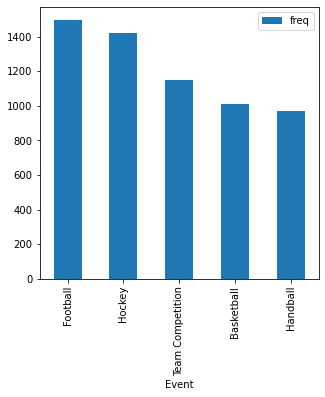

In [26]:
pd.DataFrame(data,columns = ['Event','freq']).sort_values(by='freq', ascending=False).head().plot(x = 'Event', y = 'freq', kind = 'bar', figsize = (5,5))

### 8. Which sport is having most female Gold Medalists? (Top 5)

In [27]:
df2=df[df.Medal=="Gold"]
df2[df2.Gender=="Women"].Sport.value_counts().head()

Aquatics      589
Athletics     388
Gymnastics    268
Rowing        217
Volleyball    166
Name: Sport, dtype: int64

In [28]:
data=[]
for idx,name in enumerate(df2[df2.Gender=="Women"].Sport.value_counts().head().index.tolist()):
    data.append([name,df2[df2.Gender=="Women"].Sport.value_counts().head()[idx]])
print(data)

[['Aquatics', 589], ['Athletics', 388], ['Gymnastics', 268], ['Rowing', 217], ['Volleyball', 166]]


<AxesSubplot:xlabel='Sport'>

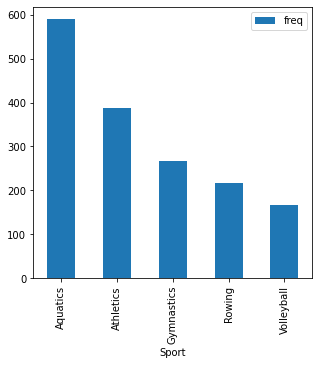

In [29]:
pd.DataFrame(data,columns = ['Sport','freq']).sort_values(by='freq', ascending=False).head().plot(x = 'Sport', y = 'freq', kind = 'bar', figsize = (5,5))